In [22]:
import pandas as pd

df = pd.read_csv('synthetic_data_lung_cancer.csv')
df.head()

,SUBJECT_ID,DEFINITION_ID,TIME
0,1,drug_217,0.004807
1,1,condition_1922,0.008643
2,1,condition_785,0.027792
3,1,drug_49,0.032515
4,1,measurement_132,0.056765


In [23]:
datatypeframe = df.copy(deep=True)
datatypeframe['DEFINITION_TYPE'] = datatypeframe['DEFINITION_ID'].str.split('_', expand=True)[0]
datatypeframe.head()

,SUBJECT_ID,DEFINITION_ID,TIME,DEFINITION_TYPE
0,1,drug_217,0.004807,drug
1,1,condition_1922,0.008643,condition
2,1,condition_785,0.027792,condition
3,1,drug_49,0.032515,drug
4,1,measurement_132,0.056765,measurement


In [24]:
unique_type_counts = datatypeframe['DEFINITION_TYPE'].value_counts()
unique_subtype_counts = datatypeframe.groupby('DEFINITION_TYPE')['DEFINITION_ID'].nunique()

for definition_type in unique_type_counts.index:
    print(f"\n{definition_type}\t {unique_type_counts[definition_type]}")
    print(f"unique values\t {unique_subtype_counts[definition_type]}")


measurement	 264961
unique values	 1332

condition	 127117
unique values	 2399

observation	 73772
unique values	 224

drug	 53355
unique values	 418

procedure	 41503
unique values	 490

death	 263
unique values	 1


In [25]:
len(set(df["SUBJECT_ID"]))

727

In [26]:
len(set(df["DEFINITION_ID"]))

4864

In [27]:
f"{format(min(df['TIME']),'.8f')} - {max(df['TIME'])}"

'0.00000129 - 16.8667122351333'

In [28]:
for index, row in df.iterrows():
    if row["SUBJECT_ID"] == 2:
        print(row)

SUBJECT_ID                      2
DEFINITION_ID    measurement_1122
TIME                     0.003203
Name: 575, dtype: object
SUBJECT_ID                    2
DEFINITION_ID    observation_39
TIME                   0.003387
Name: 576, dtype: object
SUBJECT_ID                    2
DEFINITION_ID    observation_86
TIME                   0.004011
Name: 577, dtype: object
SUBJECT_ID              2
DEFINITION_ID     drug_37
TIME             0.005205
Name: 578, dtype: object
SUBJECT_ID              2
DEFINITION_ID    drug_256
TIME             0.005841
Name: 579, dtype: object
SUBJECT_ID                    2
DEFINITION_ID    condition_2217
TIME                   0.005955
Name: 580, dtype: object
SUBJECT_ID                   2
DEFINITION_ID    procedure_331
TIME                  0.006126
Name: 581, dtype: object
SUBJECT_ID                    2
DEFINITION_ID    condition_2212
TIME                   0.008408
Name: 582, dtype: object
SUBJECT_ID                    2
DEFINITION_ID    condition_1378
T

In [29]:
df2 = pd.read_csv('synthetic_data_pca.csv')
df2.head()

,SUBJECT_ID,DEFINITION_ID,TIME
0,1,condition_141,0.019808
1,1,condition_144,0.068319
2,1,drug_108,0.069314
3,1,condition_621,0.093951
4,1,drug_283,0.133907


In [30]:
len(set(df2["SUBJECT_ID"]))

698

In [31]:
len(set(df2["DEFINITION_ID"]))

4623

In [32]:
f"{format(min(df2['TIME']),'.8f')} - {max(df2['TIME'])}"

'0.00000768 - 18.5468292618426'

In [33]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = df.sort_values(by=['SUBJECT_ID', 'TIME'])

last_entries = data.drop_duplicates('SUBJECT_ID', keep='last')
death_dict = {row['SUBJECT_ID']: (1 if row['DEFINITION_ID'] == 'death' else 0) for _, row in last_entries.iterrows()}

subject_data_list = []

for subject_id, group in data.groupby('SUBJECT_ID'):
    subject_data = {'SUBJECT_ID': subject_id}
    intervention_counts = {}

    group_non_death = group[group['DEFINITION_ID'] != 'death']
    min_time = group_non_death['TIME'].min()
    max_time = group_non_death['TIME'].max()
    time_range = max_time - min_time

    for _, row in group_non_death.iterrows():
        normalized_time = (row['TIME'] - min_time) / time_range if time_range > 0 else 0
        intervention = row['DEFINITION_ID']
        intervention_counts[intervention] = intervention_counts.get(intervention, 0) + 1
        key = f"{intervention}_{intervention_counts[intervention]}"
        subject_data[key] = normalized_time

    subject_data['death'] = death_dict[subject_id]

    subject_data_list.append(subject_data)

wide_data = pd.DataFrame(subject_data_list)
wide_data.fillna(0, inplace=True)

In [34]:
wide_data.head()

,SUBJECT_ID,drug_217_1,condition_1922_1,condition_785_1,drug_49_1,measurement_132_1,condition_1561_1,observation_182_1,condition_2391_1,condition_175_1,...,measurement_343_3,measurement_658_3,measurement_725_3,measurement_1159_3,measurement_870_3,measurement_71_3,measurement_1066_3,measurement_923_3,measurement_1081_3,measurement_15_3
0,1,0.0,0.000778,0.004665,0.005623,0.010544,0.010651,0.010820,0.012317,0.032821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.800448,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# SANITY CHECK - SHOULD OUTPUT THE LAST PROCEDURE AS 1 AND DEATH AS 1
subject_row = wide_data[wide_data["SUBJECT_ID"] == 2]

for column in subject_row.columns:
    if subject_row.iloc[0][column] == 1:
        print(column)

death
procedure_380_1


In [36]:
wide_data['death'].head()

0    0
1    1
2    0
3    1
4    0
Name: death, dtype: int64

In [37]:
death_counts = wide_data['death'].value_counts()
death_counts

death
0    464
1    263
Name: count, dtype: int64

ROC AUC Score: 0.7681192142695867


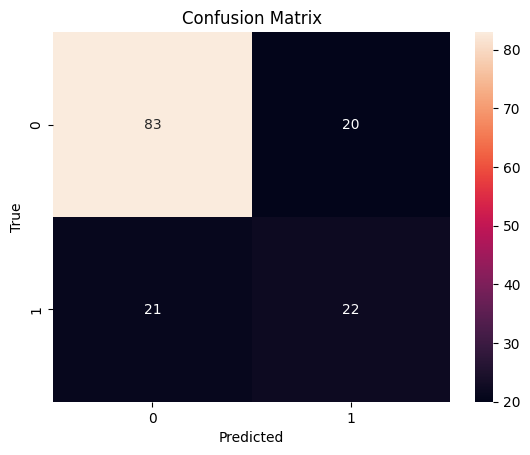

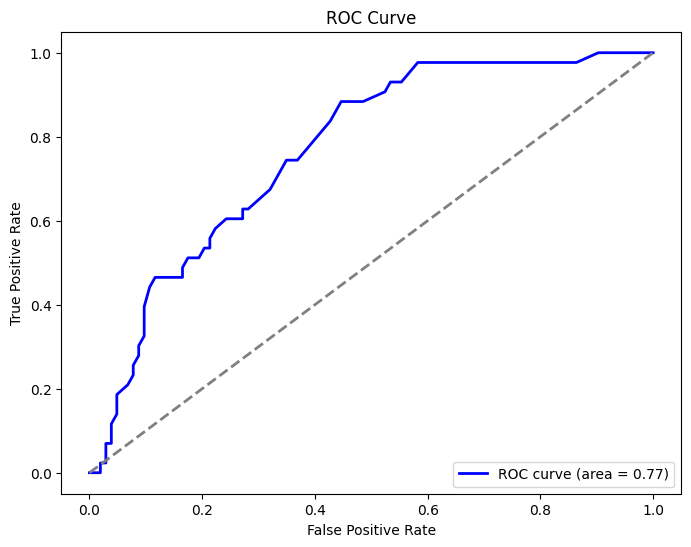

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE

features = wide_data.drop(columns=['death', 'SUBJECT_ID'], axis=1)
labels = wide_data['death']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#Testing performance on other set

In [39]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data2 = df2.sort_values(by=['SUBJECT_ID', 'TIME'])

last_entries = data2.drop_duplicates('SUBJECT_ID', keep='last')
death_dict = {row['SUBJECT_ID']: (1 if row['DEFINITION_ID'] == 'death' else 0) for _, row in last_entries.iterrows()}

subject_data_list = []

for subject_id, group in data2.groupby('SUBJECT_ID'):
    subject_data = {'SUBJECT_ID': subject_id}
    intervention_counts = {}

    group_non_death = group[group['DEFINITION_ID'] != 'death']
    min_time = group_non_death['TIME'].min()
    max_time = group_non_death['TIME'].max()
    time_range = max_time - min_time

    for _, row in group_non_death.iterrows():
        normalized_time = (row['TIME'] - min_time) / time_range if time_range > 0 else 0
        intervention = row['DEFINITION_ID']
        intervention_counts[intervention] = intervention_counts.get(intervention, 0) + 1
        key = f"{intervention}_{intervention_counts[intervention]}"
        subject_data[key] = normalized_time

    subject_data['death'] = death_dict[subject_id]

    subject_data_list.append(subject_data)

wide_test = pd.DataFrame(subject_data_list)
wide_test.fillna(0, inplace=True)

In [40]:
death_counts = wide_test['death'].value_counts()
death_counts

death
0    637
1     61
Name: count, dtype: int64

ROC AUC Score: 0.8203125


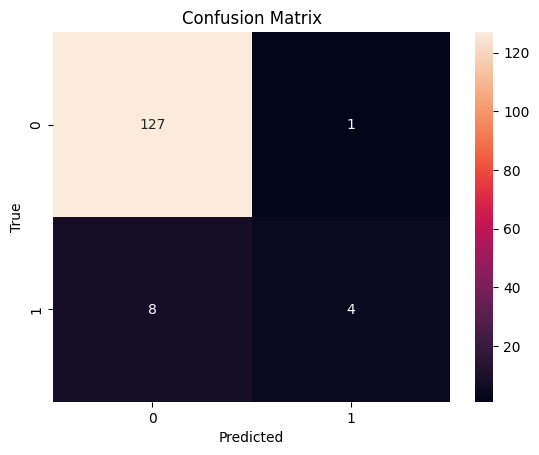

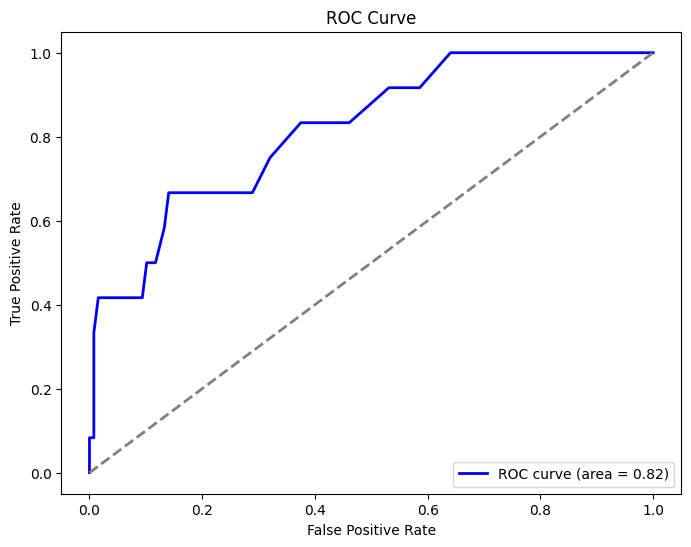

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE

features = wide_test.drop(columns=['death', 'SUBJECT_ID'], axis=1)
labels = wide_test['death']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [42]:
wide_data.to_csv("wide1.csv", index=False)
wide_test.to_csv("wide2.csv", index=False)

# Creating correlated csv files

In [43]:
# wide_data_binary
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = df.sort_values(by=['SUBJECT_ID', 'TIME'])

last_entries = data.drop_duplicates('SUBJECT_ID', keep='last')
death_dict = {row['SUBJECT_ID']: (1 if row['DEFINITION_ID'] == 'death' else 0) for _, row in last_entries.iterrows()}

subject_data_list = []

for subject_id, group in data.groupby('SUBJECT_ID'):
    subject_data = {'SUBJECT_ID': subject_id}
    intervention_counts = {}

    group_non_death = group[group['DEFINITION_ID'] != 'death']
    min_time = group_non_death['TIME'].min()
    max_time = group_non_death['TIME'].max()
    time_range = max_time - min_time

    for _, row in group_non_death.iterrows():
        normalized_time = True if time_range > 0 else False
        intervention = row['DEFINITION_ID']
        intervention_counts[intervention] = intervention_counts.get(intervention, 0) + 1
        key = f"{intervention}_{intervention_counts[intervention]}"
        subject_data[key] = normalized_time

    subject_data['death'] = death_dict[subject_id]

    subject_data_list.append(subject_data)

binary_data = pd.DataFrame(subject_data_list)
binary_data.fillna(False, inplace=True)
binary_data.drop(columns=binary_data.columns[0], axis=1, inplace=True)

binary_data.to_csv('wide_data_binary_1.csv', index=False)

In [44]:
# wide_data_dropped_bin.csv
import numpy as np

pairwise_correlations = binary_data.corr()
pairwise_correlations.values[np.triu_indices_from(pairwise_correlations, 0)] = np.nan
correlation_values = pairwise_correlations.stack()

correlated_pairs = correlation_values[correlation_values == 1.0].index

columns_to_drop = set()
for col1, col2 in correlated_pairs:
  if (col1 == "SUBJECT_ID") or (col2 == "SUBJECT_ID") or (col1 == "death") or (col2 == "death"):
    continue
  else:
    columns_to_drop.add(col2)

wide_data_dropped_bin = wide_data.drop(columns = columns_to_drop)

wide_data_dropped_bin.to_csv('wide_data_dropped_bin.csv', index=False)

In [45]:
# wide_data_dropped_time.csv
import numpy as np

pairwise_correlations = wide_data.corr()
pairwise_correlations.values[np.triu_indices_from(pairwise_correlations, 0)] = np.nan
correlation_values = pairwise_correlations.stack()

correlated_pairs = correlation_values[correlation_values == 1.0].index

columns_to_drop = set()
for col1, col2 in correlated_pairs:
  if (col1 == "SUBJECT_ID") or (col2 == "SUBJECT_ID") or (col1 == "death") or (col2 == "death"):
    continue
  else:
    columns_to_drop.add(col2)

wide_data_dropped_time = wide_data.drop(columns=columns_to_drop)
wide_data_dropped_time.to_csv('wide_data_dropped_time.csv', index=False)